In [532]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [533]:
def convolve2d(matrix, kernel, type='valid'):
    """
    isto kao cross_correlate, samo se kernel rotira 180
    """
    # Get the dimensions of the input matrix and kernel
    m, n = matrix.shape
    km, kn = kernel.shape

    if type == 'valid':
    
        # Calculate the dimensions of the output matrix
        output_dim_m = m - km + 1
        output_dim_n = n - kn + 1
        output = np.zeros((output_dim_m, output_dim_n))
        
        # Flip the kernel for convolution
        kernel_flipped = np.rot90(kernel, 2) # or kernel_flipped = np.flipud(np.fliplr(kernel))
        
        # Perform the convolution
        for i in range(output_dim_m):
            for j in range(output_dim_n):
                # Element-wise multiplication and summation
                region = matrix[i:i+km, j:j+kn]
                output[i, j] = np.sum(region * kernel_flipped)
        
        return output
    
    elif type == 'full':

        output_dim_m = m + km - 1
        output_dim_n = n + kn - 1
        output = np.zeros((output_dim_m, output_dim_n))

        kernel_flipped = np.rot90(kernel, 2)

        padded_matrix = np.pad(matrix, ((km - 1, km - 1), (kn - 1, kn - 1)), mode='constant')

        for i in range(output_dim_m):
            for j in range(output_dim_n):
                region = padded_matrix[i:i+km, j:j+kn]
                output[i, j] = np.sum(region * kernel_flipped)

        return output

def cross_correlate2d(matrix, kernel, type='valid'): 
    """
    OVO RADI

    dimenzija rezultata = dim_input - dim_kernel + 1
    Y = I - K + 1

    slidea kernel po regijama matrice velicine kernela, mnoze se elementi i zbrajaju

    valid - krece se u granicama matrice, od ruba do ruba, dimenzija je Y = I - K + 1

    full - izlazi van granica matrice, treba paddati matricu s nulama, Y = I + K - 1
    """
    # Get the dimensions of the input matrix and kernel
    m, n = matrix.shape
    km, kn = kernel.shape

    if type == 'valid':
        
        # Calculate the dimensions of the output matrix
        output_dim_m = m - km + 1
        output_dim_n = n - kn + 1
        output = np.zeros((output_dim_m, output_dim_n))
        
        # Perform the cross-correlation
        for i in range(output_dim_m):
            for j in range(output_dim_n):
                # Element-wise multiplication and summation
                region = matrix[i:i+km, j:j+kn]
                output[i, j] = np.sum(region * kernel)
        
        return output
    
    elif type == 'full':
        
        # Calculate the dimensions of the output matrix
        output_dim_m = m + km - 1
        output_dim_n = n + kn - 1
        output = np.zeros((output_dim_m, output_dim_n))
        
        # Pad the input matrix with zeros
        padded_matrix = np.pad(matrix, ((km-1, km-1), (kn-1, kn-1)), mode='constant')

        # Perform the cross-correlation
        for i in range(output_dim_m):
            for j in range(output_dim_n):
                # Element-wise multiplication and summation
                region = padded_matrix[i:i+km, j:j+kn]
                output[i, j] = np.sum(region * kernel)
        
        return output
        

# Cross Correlate

In [534]:
a = np.array([[1, 6, 2],
              [5, 3, 1],
              [7, 0 ,4]])

kernel = np.array([[1, 2],
                   [-1, 0]])

c = cross_correlate2d(a, kernel)
print(c)

c = signal.correlate2d(a, kernel, mode='valid')
print(c)

[[8. 7.]
 [4. 5.]]
[[8 7]
 [4 5]]


# Cross Correlate full

In [535]:
a = np.array([[1, 6, 2],
              [5, 3, 1],
              [7, 0 ,4]])

kernel = np.array([[1, 2],
                   [-1, 0]])

c = cross_correlate2d(a, kernel, type='full')
print(c)

c = signal.correlate2d(a, kernel)
print(c)

[[ 0. -1. -6. -2.]
 [ 2.  8.  7.  1.]
 [10.  4.  5. -3.]
 [14.  7.  8.  4.]]
[[ 0 -1 -6 -2]
 [ 2  8  7  1]
 [10  4  5 -3]
 [14  7  8  4]]


# Convolve

In [536]:
a = np.array([[1, 6, 2],
              [5, 3, 1],
              [7, 0 ,4]])

kernel = np.array([[1, 2],
                   [-1, 0]])

c = convolve2d(a, kernel)
print(c)

c = signal.convolve2d(a, kernel, mode='valid')
print(c)

[[ 7.  5.]
 [11.  3.]]
[[ 7  5]
 [11  3]]


# Convolve full

In [537]:
a = np.array([[1, 6, 2],
              [5, 3, 1],
              [7, 0 ,4]])

kernel = np.array([[1, 2],
                   [-1, 0]])

c = convolve2d(a, kernel, type='full')
print(c)

c = signal.convolve2d(a, kernel)
print(c)

[[ 1.  8. 14.  4.]
 [ 4.  7.  5.  2.]
 [ 2. 11.  3.  8.]
 [-7.  0. -4.  0.]]
[[ 1  8 14  4]
 [ 4  7  5  2]
 [ 2 11  3  8]
 [-7  0 -4  0]]


# Convolutional layer

In [538]:
from dlfs.base import Layer

class ConvolutionalLayer(Layer):

    def __init__(self, input_shape: tuple, output_depth: int, kernel_size: int, stride: int = 1) -> None:
        """
        Convolutional layer.

        Parameters
        ----------
        input_shape : tuple
            Dimension of a single sample processed by the layer. For images it's (depth, height, width).

        output_depth : int
            Depth of the output array.

        kernel_size : int
            Dimension of a single kernel, a square array of shape (kernel_size, kernel_size).

        stride : int, default=1
            Step size at which the kernel moves across the input.
        """
        # Unpack the input_shape tuple
        input_depth, input_height, input_width = input_shape
        self.stride = stride
        self.kernel_size = kernel_size
        self.output_depth = output_depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        #self.output_shape = (output_depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        output_height = int(np.floor((input_height - kernel_size) / stride) + 1) 
        output_width = int(np.floor((input_width - kernel_size) / stride) + 1)
        self.output_shape = (output_depth, output_height, output_width)
        self.kernels_shape = (output_depth, input_depth, kernel_size, kernel_size)
        # Initialize layer parameters
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the convolutional layer. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Number of samples, first dimension
        n_samples = inputs.shape[0]
        self.inputs = inputs

        # Output is 4D tensor of shape (n_samples, output_depth, height, width)
        self.output = np.zeros((n_samples, *self.output_shape))
        self.output += self.biases

        for i in range(self.output_depth):
            for j in range(self.input_depth):
                for k in range(n_samples):
                    self.output[k, i] += signal.correlate2d(self.inputs[k, j], self.kernels[i, j], mode="valid")[::self.stride, ::self.stride]
            
    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the convolutional layer. Creates gradient attributes with respect to kernels, biases and inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        self.dkernels = np.zeros(self.kernels.shape)
        self.dbiases = np.zeros(self.biases.shape)
        self.dinputs = np.zeros(self.inputs.shape)
        n_samples = self.inputs.shape[0]

        for i in range(self.output_depth):
            for j in range(self.input_depth):
                for k in range(n_samples):

                    self.dbiases[i] += delta[k, j]

                    if self.stride == 1:
                        self.dkernels[i, j] += signal.correlate2d(self.inputs[k, j], delta[k, j], "valid")
                        self.dinputs[k, j] += signal.convolve2d(delta[k, j], self.kernels[i, j], "full")
                    else:
                        dinputs_stride = signal.convolve2d(delta[k, j], self.kernels[i, j], "full")
                        #dkernels_stride = signal.correlate2d(self.inputs[k, j], delta[k, j], "valid")[::self.stride, ::self.stride]

                        for y in range(0, self.output_shape[1], self.stride):
                            for x in range(0, self.output_shape[2], self.stride):
                                self.dinputs[k, j, y // self.stride, x // self.stride] += dinputs_stride[y, x]
                                self.dkernels[i, j] += self.inputs[k, j, y:y+self.kernel_size, x:x+self.kernel_size] * delta[k, i, y, x]


# Reshape layer

In [539]:
class ReshapeLayer(Layer):

    def __init__(self, input_shape, output_shape) -> None:
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, inputs):
        # converts [batch_size, depth, height, width] to [batch_size, depth * height * width]
        batch_size = inputs.shape[0]
        self.output = np.reshape(inputs, (batch_size, self.output_shape))

    def backward(self, delta):
        # converts [batch_size, depth * height * width] to [batch_size, depth, height, width]
        batch_size = delta.shape[0]
        self.dinputs = np.reshape(delta, (batch_size, *self.input_shape))

# Binary MNIST classification

In [540]:
from keras.datasets import mnist
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    return x, y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

In [541]:
from dlfs.layers import DenseLayer
from dlfs.activation import Sigmoid
from dlfs.loss import BCE_Loss
from dlfs.optimizers import Optimizer_SGD
from dlfs import Model

# 26, 13, 9, 7
# output = floor( (input - kernel) / stride ) + 1
layers = [ConvolutionalLayer(input_shape=(1, 28, 28), output_depth=5, kernel_size=3, stride=3),
          Sigmoid(),
          ReshapeLayer(input_shape=(5, 9, 9), output_shape=5*9*9),
          DenseLayer(5 * 9 * 9, 100),
          Sigmoid(),
          DenseLayer(100, 1),
          Sigmoid()]

model = Model(layers=layers, loss_function=BCE_Loss(), optimizer=Optimizer_SGD(5e-4))

model.train(x_train, y_train.reshape(-1, 1), print_every=20, epochs=100)

===== EPOCH : 0 ===== LOSS : 0.6993317267087176 =====


ValueError: operands could not be broadcast together with shapes (28,28) (4,4) (28,28) 

In [ ]:
y_pred = model.predict(x_test)
print(f'Model accuracy: {np.mean(np.round(y_pred) == y_test.reshape(-1, 1))}')

Model accuracy: 0.99


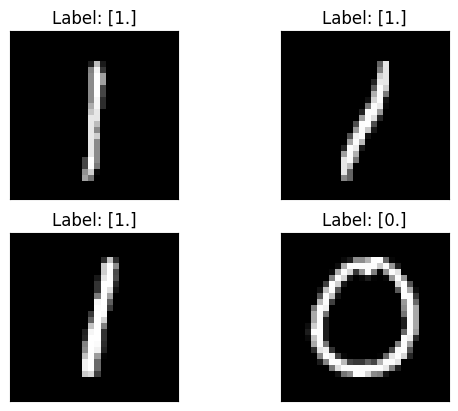

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
i, j = 0, 0

for idx, x in enumerate(x_test[:4]):

    img = x.reshape(28, 28)
    x = x.reshape(1, *x.shape)
    y_pred = model.predict(x)

    ax[i, j].imshow(img, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_title(f'Label: {np.round(y_pred[0])}')

    j += 1
    if j % 2 == 0:
        i += 1
        j = 0

plt.show()

# Visualization of kernels learned

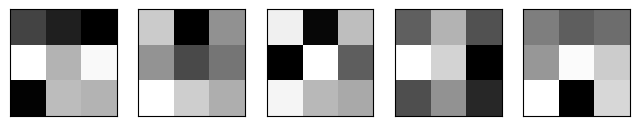

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(8, 8))

conv = model.layers[0]

for i in range(conv.output_depth):
    for j in range(conv.input_depth):

        x = conv.kernels[i, j]
        ax[i].imshow(x, cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])

plt.show()

# MNIST classification

In [ ]:
def preprocess_whole_mnist(x):
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    return x

def one_hot_encode(y):
    categories = np.unique(y)
    encoded_y = np.zeros((len(y), len(categories)))

    for idx, label in enumerate(y):
        to_encode_idx = np.argwhere(categories == label)
        encoded_y[idx, to_encode_idx] = 1

    return encoded_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_whole_mnist(x_train[:1000])
x_test = preprocess_whole_mnist(x_test[:1000])

y_train = one_hot_encode(y_train[:1000])
y_test = one_hot_encode(y_test[:1000])

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 1, 28, 28)
(1000, 1, 28, 28)
(1000, 10)
(1000, 10)


In [ ]:
from dlfs.base import Loss, Activation

class CCE_Loss(Loss):

    def calculate(self, y_pred, y_true):
        samples = range(len(y_pred))
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[samples, y_true]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        return (-np.sum(np.log(correct_confidences)))

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if(len(y_true.shape)) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples   

class Softmax(Activation):

    def forward(self, inputs):
        self.inputs = inputs
        exp = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp / np.sum(exp, axis=1, keepdims=True) 

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues) 

        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):

            single_output = single_output.reshape(-1, 1)

            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues) 

In [ ]:
layers = [ConvolutionalLayer(input_shape=(1, 28, 28), output_depth=5, kernel_size=3),
          Sigmoid(),
          ReshapeLayer(input_shape=(5, 26, 26), output_shape=5 * 26 * 26),
          DenseLayer(5 * 26 * 26, 100),
          Sigmoid(),
          DenseLayer(100, 10),
          Softmax()]

model = Model(layers=layers, loss_function=CCE_Loss(), optimizer=Optimizer_SGD(learning_rate=3e-2))

model.train(x_train, y_train, print_every=10, epochs=50)

===== EPOCH : 0 ===== LOSS : 2550.510128098321 =====
===== EPOCH : 10 ===== LOSS : 2315.241271033432 =====
===== EPOCH : 20 ===== LOSS : 2288.612126102572 =====
===== EPOCH : 30 ===== LOSS : 2272.6092355554024 =====


KeyboardInterrupt: 

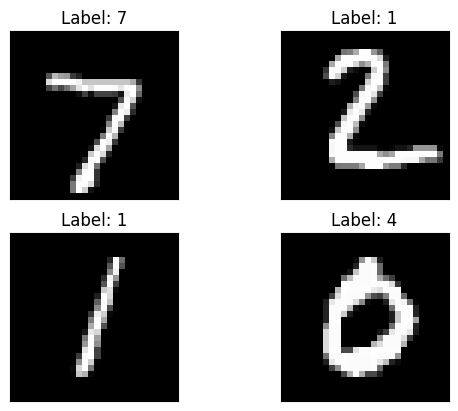

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
i, j = 0, 0

for idx, x in enumerate(x_test[:4]):

    img = x.reshape(28, 28)
    x = x.reshape(1, *x.shape)
    y_pred = model.predict(x)

    ax[i, j].imshow(img, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_title(f'Label: {np.argmax(y_pred)}')

    j += 1
    if j % 2 == 0:
        i += 1
        j = 0

plt.show()